In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
aruodas = pd.read_csv('AruodasUzd.csv', sep=";")

#surinkite iš puslapių nuo 2 iki 11-to butų skelbimus ir tokią informaciją - kaina, kaina už 1 kv metrą, adresas, plotas, kambarių kiekis. 
# šiuos duomenis eksportuokite į csv failą, skirtukas turi būti ;.
#suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.
#pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.
#Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.
#pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?

In [3]:
#suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.

def VDUconverter(sk):
    skaicius = float(sk.replace(' ',''))
    vdu = skaicius /1902

    if vdu >= 0.1 and vdu <= 0.99:
        vdu = 'pigus'
    elif vdu > 1 and vdu < 3:
        vdu = 'brangus'
    else:
        vdu = 'Neiperkami'
    return vdu



aruodas['KV_kaina_VDU'] = aruodas['KainaKV'].apply(VDUconverter)

aruodas.head(50)

,Unnamed: 0,Adresas,Kaina,KainaKV,plotas,KambariuSk,KV_kaina_VDU
0,0,"Klaipėda, Centras, Danės g.",103 000 €,2 512,41.00,2,brangus
1,1,"Vilnius, Baltupiai, Kazio Ulvydo g.",315 000 €,4 011,78.53,3,brangus
2,2,"Palanga, Šventoji, Mėguvos g.",38 940 €,1 770,22.00,1,pigus
3,3,"Vilnius, Naujamiestis, Skroblų g.",182 117 €,4 137,44.02,2,brangus
4,4,"Vilnius, Bajorai, Salaspilio g.",164 692 €,2 440,67.50,3,brangus
5,5,"Palanga, Palanga, Saulėlydžio g.",135 000 €,2 213,61.00,2,brangus
6,6,"Vilnius, Santariškės, M. Bukšos g.",319 968 €,3 325,96.22,4,brangus
7,7,"Vilnius, Žirmūnai, Raitininkų g.",280 000 €,5 477,51.12,2,brangus
8,8,"Vilnius, Pašilaičiai, Pavilnionių g.",160 000 €,2 218,72.14,3,brangus
9,9,"Vilnius, Šnipiškės, Olimpiečių g.",995 000 €,10 16,97.93,3,pigus


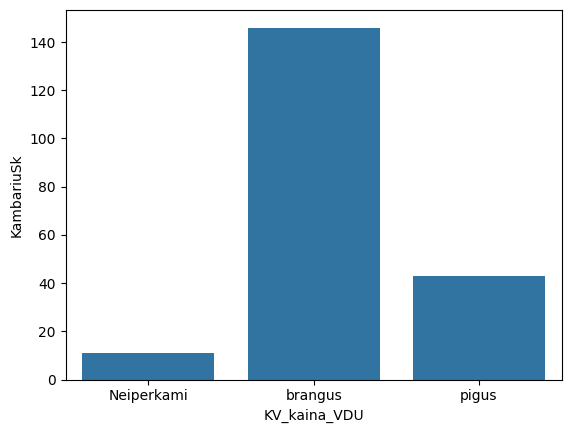

In [4]:
#pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.

def converter(sk):
    skaicius = int(sk)
    return skaicius


aruodas['KambariuSk'] = aruodas['KambariuSk'].apply(converter)
aruodas.head()

sns.barplot(data=aruodas.groupby('KV_kaina_VDU').count(), x='KV_kaina_VDU', y='KambariuSk')
plt.show()

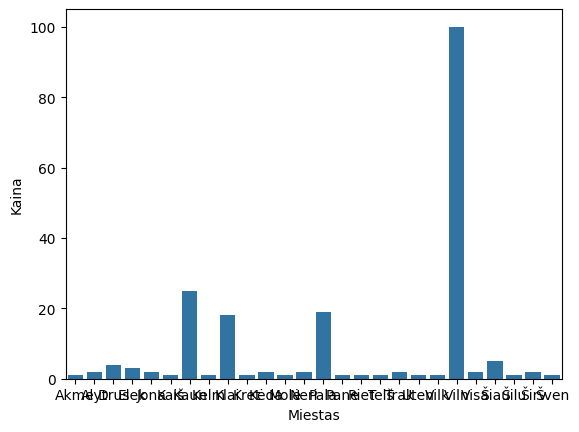

In [5]:
#Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.

# def Kainaconverter(sk):
#     skaicius = float(sk.replace(' ',''))
#     return skaicius

# aruodas['Nkaina'] = aruodas['Kaina']

def miestoKeturi(miestas):
    miestoTrys = miestas[:4]
    return miestoTrys

aruodas['Miestas'] = aruodas['Adresas'].apply(miestoKeturi)
# aruodas['Miestas'] = aruodas['Miestas'].value_counts().sort_index().reset_index()
aruodas.head(55)

sns.barplot(data=aruodas.groupby(by='Miestas').count(), x='Miestas', y='Kaina' )

plt.show()

In [14]:
#pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?

aruodas['SkirtMiestai'] = aruodas['Miestas'].nunique()


sns.barplot(data=aruodas.value_counts(), x='Miestas', y='SkirtMiestai' )

plt.show()




TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.